### Movie Genre Classification

In [69]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [70]:
!pip install nltk


In [71]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
#importing the training data
data = pd.read_csv('train_data.txt',delimiter = ':::',header = None,engine = 'python')

In [73]:
data.shape

(54214, 4)

### Data Cleaning

In [74]:
#dropping Duplicate values
data.drop_duplicates(inplace = True)
data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [75]:
data.shape

(54214, 4)

In [76]:
# giving names to the columns
data.columns = ['id','title','genre','description']


In [77]:
#Dropping lesser relevant columns
data.drop(['id','title'],axis=1)
data.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


### Data Visualization

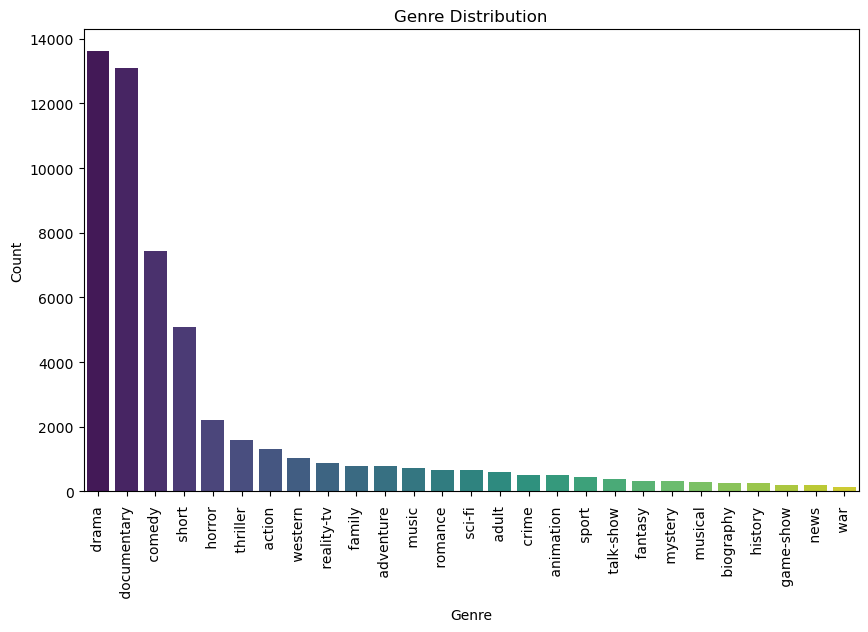

In [78]:
# PLOT THE DISTRIBUTION OF GENRES IN THE TRAINING DATASET
plt.figure(figsize=(10,6))
sns.countplot(x='genre' , data=data , order=data['genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing

In [79]:
# setting stopwords for English
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
#printing the stopwords to see what's included
print(stopwords)

{'o', 'just', "don't", 'there', 'then', 'their', 'what', 'who', 'having', 'any', 'we', 'don', 'be', 'why', 'me', 'after', 'i', 'both', 'll', 'all', 'before', "wasn't", 'aren', 'should', 'in', 'he', 'these', 'against', "haven't", 'mustn', 'yours', 'been', 'hadn', 'which', 'were', 'her', "isn't", 'herself', "she's", 'will', 'at', 'are', 'but', 'during', 've', 'between', 'couldn', 'here', "shan't", 'a', 'of', 'do', 'from', 'than', 'they', 'is', 'or', 're', 'until', 'own', "you'll", "hadn't", 'to', 'those', 'd', 'am', 'that', 'doing', 'out', 'again', "mustn't", 'too', 'about', 'it', "you're", 'mightn', 'myself', 'shan', 'needn', 'ourselves', 'down', 'your', 'isn', 'some', 'if', 'whom', 'was', 'yourself', 'when', 'didn', 'above', "doesn't", 'won', 'the', 'm', 'into', "you'd", 'on', "should've", 's', "needn't", 'being', 'weren', 'now', 'hers', 'does', 'have', "it's", 'for', 'each', 'has', 'himself', "that'll", "won't", 'theirs', 'and', "couldn't", "weren't", 'wasn', 'haven', 'most', "you've"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
def datapreprocessing(text):
    #coverting to lowercase
    text = text.lower()
    #removing punctuation using regular expression
    text = re.sub(r'[^\w\s]',' ',text)
    #Removing specific characters like @,#,$
    text = re.sub(r'[#@\$]',' ',text)
    #Tokenize and covert to list
    tokens = word_tokenize(text)
    #Lemmatize the tokens
    #lemmatizer = WordNetLemmatizer()
    #Lemmatize each token
    text = text.split()
    #Removing stopwords
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    text = [word for word in text if word not in stop_words]
    
    return " ".join(text)
    

In [81]:
# preprocessing the description
data['desc_clean'] = data['description'].apply(datapreprocessing)

In [82]:
data['desc_clean']

0        listening conversation doctor parents 10 year ...
1        brother sister past incestuous relationship cu...
2        bus empties students field trip museum natural...
3        help unemployed father make ends meet edith tw...
4        film title refers un recovered bodies ground z...
                               ...                        
54209    short lived nbc live sitcom centered bonino wo...
54210    next generation exploitation sisters kapa bay ...
54211    ze bestaan echt stand comedy growing facing fe...
54212    walter vivian live country difficult time keep...
54213    labor day weekend 1935 intense hurricane ever ...
Name: desc_clean, Length: 54214, dtype: object

In [83]:
data['genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64

In [84]:
#importing necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


### Data Splitting

In [85]:
x = data['desc_clean']
y = data['genre']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

vectorizer = TfidfVectorizer()
x_train2 = vectorizer.fit_transform(x_train)
x_test2 = vectorizer.transform(x_test)



### Feature Extraction

In [87]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 = vectorize.transform(x_test)


In [88]:
vectorizer = TfidfVectorizer()
x_train2 = vectorizer.fit_transform(x_train)
x_test2  = vectorizer.transform(x_test)

### Model Training and Prediction

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model score on training data:  0.6998916326577667
model score on test data:  0.5842479018721756


C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.51      0.21      0.30       292
       adult        0.86      0.18      0.30        99
   adventure        0.62      0.10      0.18       155
   animation        1.00      0.01      0.02        96
   biography        0.00      0.00      0.00        40
      comedy        0.52      0.59      0.55      1451
       crime        0.00      0.00      0.00       114
 documentary        0.67      0.88      0.76      2664
       drama        0.53      0.80      0.64      2662
      family        0.60      0.07      0.13       166
     fantasy        0.00      0.00      0.00        65
   game-show        0.80      0.27      0.41        44
     history        0.00      0.00      0.00        55
      horror        0.72      0.61      0.66       459
       music        0.64      0.36      0.46       138
     musical        0.00      0.00      0.00        55
     mystery        0.00      0.00      0.00        69
        n

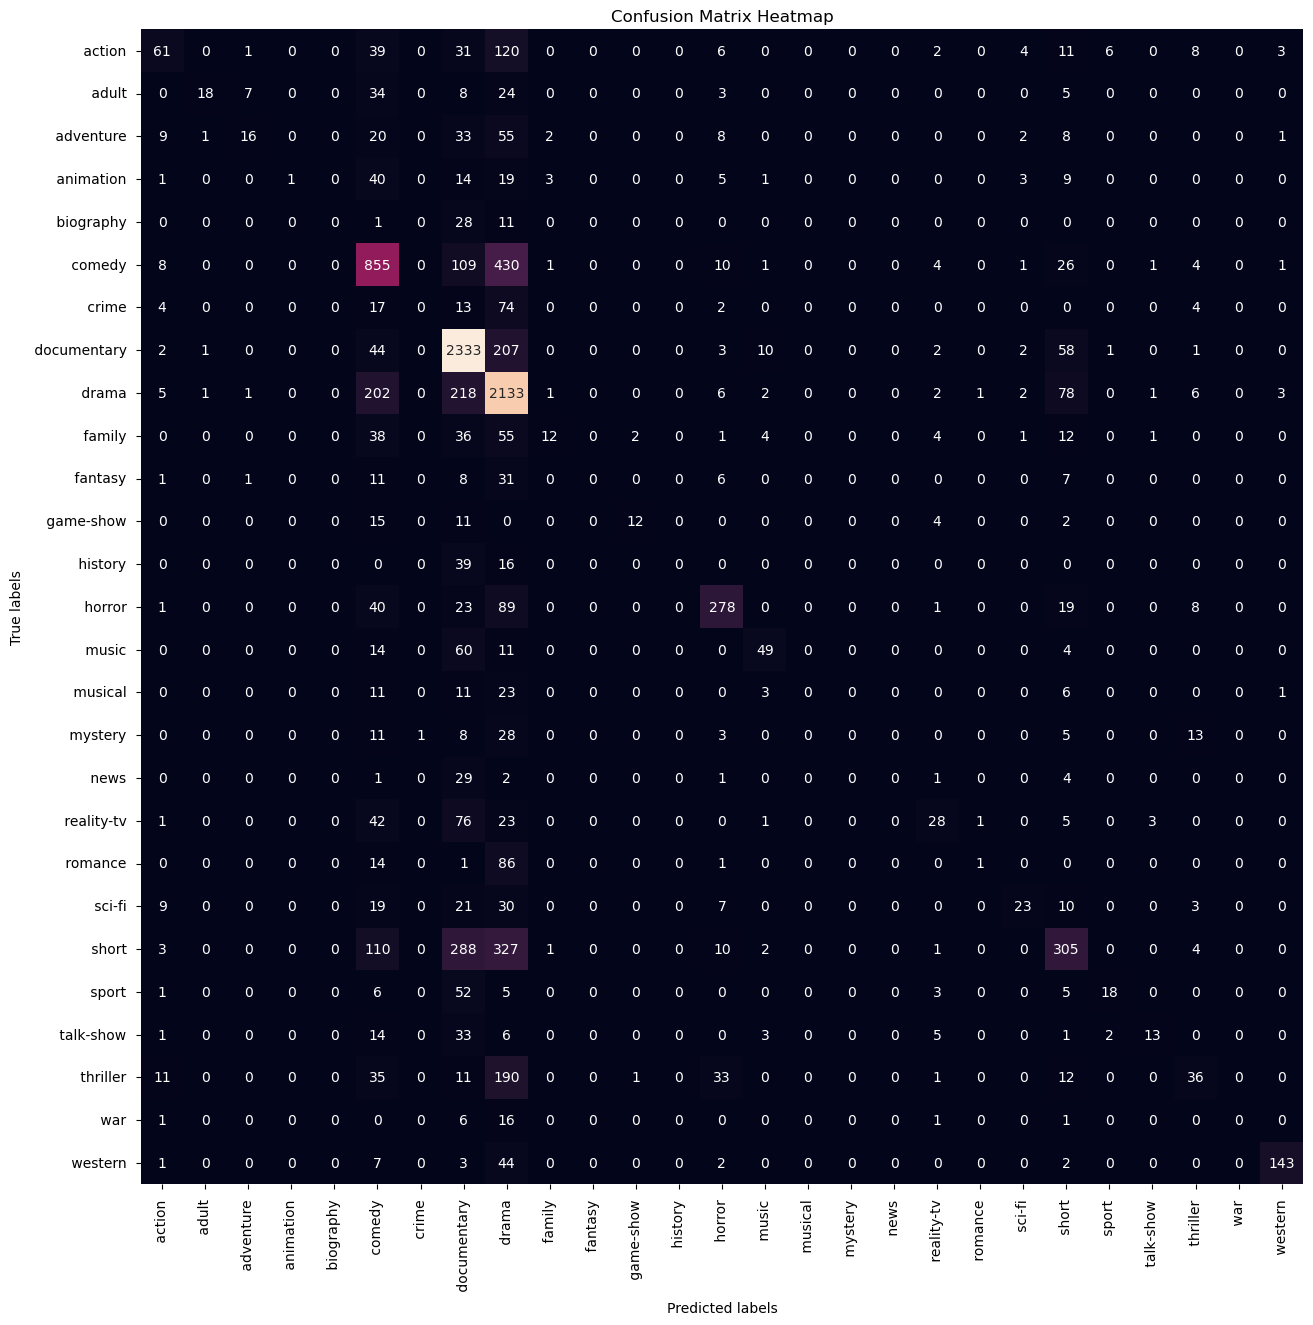

In [89]:
model = LogisticRegression()
model.fit(x_train2, y_train)
print('model score on training data: ', model.score(x_train2, y_train))
print('model score on test data: ', model.score(x_test2, y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, xticklabels=classes_names, yticklabels=classes_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')
plt.show()